# Дашборд для Яндекс.Дзен
Пообщавшись с менеджерами и администраторами баз данных, вы написали краткое ТЗ:
Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;
Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;
Кто будет основным пользователем дашборда: менеджеры по анализу контента;
Состав данных для дашборда:
История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
Разбивка событий по темам источников;
Таблица соответствия тем источников темам карточек;
По каким параметрам данные должны группироваться:
Дата и время;
Тема карточки;
Тема источника;
Возрастная группа;
Характер данных:
История событий по темам карточек — абсолютные величины с разбивкой по минутам;
Разбивка событий по темам источников — относительные величины (% событий);
Соответствия тем источников темам карточек - абсолютные величины;
Важность: все графики имеют равную важность;
Источники данных для дашборда: cырые данные о событиях взаимодействия пользователей с карточками (таблица log_raw);
База данных, в которой будут храниться агрегированные данные: дополнительные агрегированные таблицы в БД zen;
Частота обновления данных: один раз в сутки, в полночь по UTC;
Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):

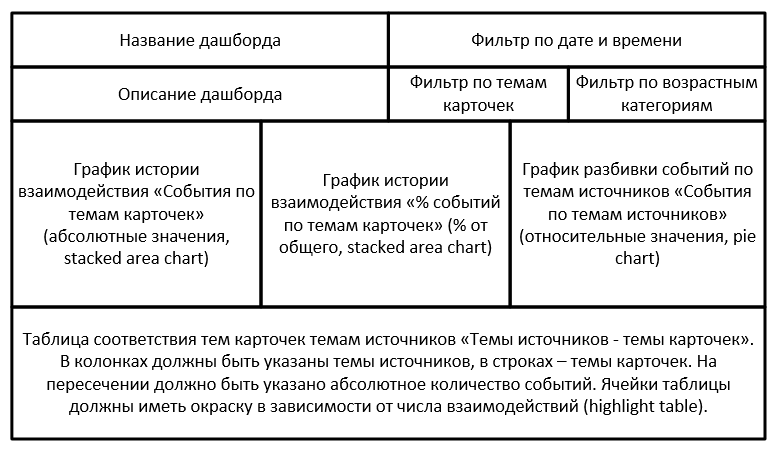

record_id - идентификатор пользователя;      
item_topic - тема карточек    
source_topic - темы источника    
age_segment - возрастные категории  
dt - дата и время          
visits - визиты

In [ ]:
pip install dash

     |████████████████████████████████| 7.3 MB 5.4 MB/s 
     |████████████████████████████████| 26.5 MB 1.6 MB/s 
     |████████████████████████████████| 357 kB 58.3 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=9044d2933abd50bef9dbce36ea49f419f0dceab876ce0e184485c9fd72baf353
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=7c1ef15441b1a6d8c0e9c5aed6d06c2dd05e26fe17daf3eea5dd9f3212589d48
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=f73d1f6d9d35ca08b86b5e9df1631fc338b65fe63c7d217c7a5910dde463aac3
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aef

In [ ]:
pip install jupyter-dash

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

import plotly.graph_objs as go

from datetime import datetime

#!/usr/bin/python
# -*- coding: utf-8 -*-

import pandas as pd
from sqlalchemy import create_engine

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
query = '''
    SELECT * FROM dash_visits
        '''
dash_visits = pd.io.sql.read_sql(query, con = engine)
dash_visits.to_csv('dash_visits.csv', index = False)
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


In [ ]:
dash_visits.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


In [ ]:
dash_visits['item_topic'].value_counts()

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64

In [ ]:
dash_visits['age_segment'].value_counts()

18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

In [ ]:
dash_visits['source_topic'].value_counts()

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1243
Искусство             1228
Авто                  1077
Психология            1055
Сад и дача            1036
Политика              1024
Спорт                 1007
Сделай сам             995
Ремонт                 985
Деньги                 973
Еда                    912
Интерьеры              809
Строительство          758
Музыка                 750
Технологии             741
Финансы                667
Name: source_topic, dtype: int64

In [ ]:
dash_visits['visits'].value_counts()

1      8999
2      4304
3      2637
4      1879
5      1359
       ... 
210       1
194       1
178       1
146       1
207       1
Name: visits, Length: 212, dtype: int64

In [ ]:
dash_visits['dt'].value_counts()

2019-09-24 18:58:00    3383
2019-09-24 18:57:00    3342
2019-09-24 18:56:00    3325
2019-09-24 18:59:00    3317
2019-09-24 18:55:00    3088
2019-09-24 19:00:00    2729
2019-09-24 18:54:00    2551
2019-09-24 18:30:00    1261
2019-09-24 18:32:00    1257
2019-09-24 18:31:00    1253
2019-09-24 18:53:00    1107
2019-09-24 18:29:00    1031
2019-09-24 18:33:00    1007
2019-09-24 18:52:00     719
2019-09-24 18:28:00     615
2019-09-24 18:34:00     576
2019-09-24 18:35:00     184
Name: dt, dtype: int64

Датасет состоит из 6 столбцов и 30745 строк.В 'item_topic' 25 тем карточек(больше всего 1.отношения(1536),2.интересные факты(1535)), в 'source_topic' 26 темы источника(большая популярность у семейных отношений(1822)), в 'age_segment' 6 возрастных категорий(больше всего в 18-25(7056)), в 'dt' 17 времени.

